In [300]:
import sys
import h5py
import importlib
import multiprocessing
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append('../../')

import matplotlib.pyplot as plt
import numpy as np
import Phys
# physical constants in cgs units
constants = Phys.ReadPhys()

from SpecWizard_Input import ReadData
from SpecWizard_BuildInput import Build_Input
from SpecWizard_ProjectData import SightLineProjection
from SpecWizard_ComputeOpticaldepth import ComputeOpticaldepth


In [301]:
import SpecWizard_AnalyseOpticaldepth
SpecWizard_AnalyseOpticaldepth = importlib.reload(SpecWizard_AnalyseOpticaldepth)
from SpecWizard_AnalyseOpticaldepth import Analyse_Opticaldepth

In [302]:
import SpecWizard_AnalyseOpticaldepth
SpecWizard_AnalyseOpticaldepth = importlib.reload(SpecWizard_AnalyseOpticaldepth)
from SpecWizard_AnalyseOpticaldepth import Analyse_Opticaldepth
import SpecWizard_read_obs_data
SpecWizard_read_obs_data = importlib.reload(SpecWizard_read_obs_data)
from SpecWizard_read_obs_data import read_obs_data

#### Import the input parameters in the yml file

In [303]:
buildinput = Build_Input()

In [304]:
wizard = buildinput.read_from_yml('Wizard.yml')

something


#### We run for one line

In [305]:
wizard['sightline']['nsight'] = 0
read_data = ReadData(wizard)
particles = read_data.read_particles()
sightlineprojection  = SightLineProjection(wizard)
projected_LOS        = sightlineprojection.ProjectData(particles)
cspec          = ComputeOpticaldepth(wizard)
opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)


Element fraction not found using primordial quantities...
Warning! Metallicities not found. Setting them to zero.
We divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite support
Warning! Not able to read Star formation Rate properties...setting SFR to zero!


/cosma/local/Python/3.6.5/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


#### Make this a function to calculate in parallel more lines

In [51]:
def do_sight(isight, projections):
    wizard['sightline']['nsight'] = isight
    read_data = ReadData(wizard)    
    read_data = ReadData(wizard)
    particles = read_data.read_particles()
    sightlineprojection  = SightLineProjection(wizard)
    projected_LOS        = sightlineprojection.ProjectData(particles)
    cspec          = ComputeOpticaldepth(wizard)
    opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)

    particles = read_data.read_particles()
    sightlineprojection  = SightLineProjection(wizard)
    projected_LOS        = sightlineprojection.ProjectData(particles)
    cspec          = ComputeOpticaldepth(wizard)
    opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)
    result                = {"nsight": isight,  
                             'OpticaldepthWeighted':opticaldepth}
    projections[isight] = result

In [151]:
ncpu   = 5      # number of cores to be used
nsight = 100     # number of sight lines to compute
#    
pool   = multiprocessing.Pool(ncpu)
manager      = multiprocessing.Manager()
projections  = manager.dict()

for i in range(nsight):
    pool.apply_async(do_sight, args=(i, projections))
pool.close()
pool.join()

Element fraction not found using primordial quantities...
Warning! Metallicities not found. Setting them to zero.
We divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite support
Element fraction not found using primordial quantities...Warning! Not able to read Star formation Rate properties...setting SFR to zero!Element fraction not found using primordial quantities...Element fraction not found using primordial quantities...



Warning! Metallicities not found. Setting them to zero.Warning! Metallicities not found. Setting them to zero.Warning! Metallicities not found. Setting them to zero.
Element fraction not found using primordial quantities...


We divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite supportWe divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite supportWe divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite supportWarning! Metallicities not found. Set

/cosma/local/Python/3.6.5/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/cosma/local/Python/3.6.5/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/cosma/local/Python/3.6.5/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/cosma/local/Python/3.6.5/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/cosma/local/Python/3.6.5/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


Element fraction not found using primordial quantities...
Warning! Metallicities not found. Setting them to zero.
We divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite support
Warning! Not able to read Star formation Rate properties...setting SFR to zero!
Element fraction not found using primordial quantities...
Warning! Metallicities not found. Setting them to zero.
We divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite support
Warning! Not able to read Star formation Rate properties...setting SFR to zero!
Element fraction not found using primordial quantities...
Warning! Metallicities not found. Setting them to zero.
We divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite support
Warning! Not able to read Star formation Rate properties...setting SFR to zero!
Element fraction not found using primordial quantities...
Warning! Metallicities not found. Setting them to zero.
We divide Swift's smoothi

#### We concatenate all the optical depths into one array

In [85]:
ODs = np.array([projections[los_n]['OpticaldepthWeighted'][('Hydrogen',
  'H I')]['Optical depths']['Value'] for  los_n in projections.keys()])

#### Load the analysis tools 

In [294]:
Analysis = Analyse_Opticaldepth(wizard=wizard)

We can get the mean transmission using the corresponding analysis tool

In [177]:
Analysis.Mean_Transmission(ODs = ODs)

0.4212475279349401

We can for example load a function that give us the Oñorbe effective optical depth as shown in 

In [173]:
z = wizard['Header']['Cosmo']['Redshift']

In [174]:
oñorbe_flux = np.exp(-Analysis.Onorbe_EffectiveTau(z))

In [175]:
oñorbe_flux

0.34066418902887285

We can get the scaling factor with this function, we give our array of optical depths, and the mean flux we want to have, and some accuracy 

In [71]:
scale_tau  = Analysis.Scale_Tau(ODs,meanflux=oñorbe_flux,accuracy=1e-4)


We can scale it as follows 

In [86]:
np.mean(np.exp(-ODs*scale_tau))

0.340753623725705

or use the mean transmission function with the optional parameter scale_factor

In [87]:
Analysis.Mean_Transmission(ODs = ODs,scale_factor = scale_tau)

0.340753623725705

## FPS

Lets try to do some FPS, comparing it with data from VidIRsic2017 

In [295]:
read_obsdat = read_obs_data(datapath='../../data/')
viddata = read_obsdat.VidIrsic_2017(filename='VidIrsic2017_data',plot=False)
meanFluxD = np.genfromtxt("../../data/VidMeanFlux.csv",delimiter=',',dtype=float)

We load the mean flux that they used aswell as the corresponding redshfits 

In [296]:
vidz = meanFluxD[:,0]
vidMF = meanFluxD[:,1]

In [322]:
vidz

array([2.99891501, 3.19927667, 3.39963834, 3.6       , 3.79963834,
       4.        , 4.20036166])

In [317]:
box                = wizard['sightline']['Boxkms']['Value']
npix               = len(ODs[0])
data_fit           = vidMF[-1] #np.exp(-AOD.Kim2020_PowerLawTauFit(z))
scale_tau          = Analysis.Scale_Tau(ODs,meanflux=data_fit,accuracy=1e-4)
akPk               = []
for OD in ODs:

    OD            *= scale_tau
    flux           = np.exp(-OD)
    k,kFPS         = Analysis.FluxPS(flux,data_fit,npix,box)
    akPk.append(kFPS)
kcent,kPkbinned    = Analysis.bin_PS(k,akPk)


In [283]:
10**np.arange(np.log10(0.0005), np.log10(0.07), 0.2)


array([0.0005    , 0.00079245, 0.00125594, 0.00199054, 0.00315479,
       0.005     , 0.00792447, 0.01255943, 0.01990536, 0.03154787,
       0.05      ])

In [320]:
k

array([0.00000000e+00, 2.91187754e-03, 5.82375509e-03, ...,
       3.13318024e+00, 3.13609211e+00, 3.13900399e+00])

In [318]:
kcent,kPkbinned 

(array([0.00064622, 0.00102419, 0.00162324, 0.00257266, 0.00407739,
        0.00646223, 0.01024195, 0.0162324 , 0.02572661, 0.04077393]),
 array([0.        , 0.        , 0.        , 0.27264104, 0.        ,
        0.35127588, 0.50427877, 0.58292295, 0.57524984, 0.47707975]))

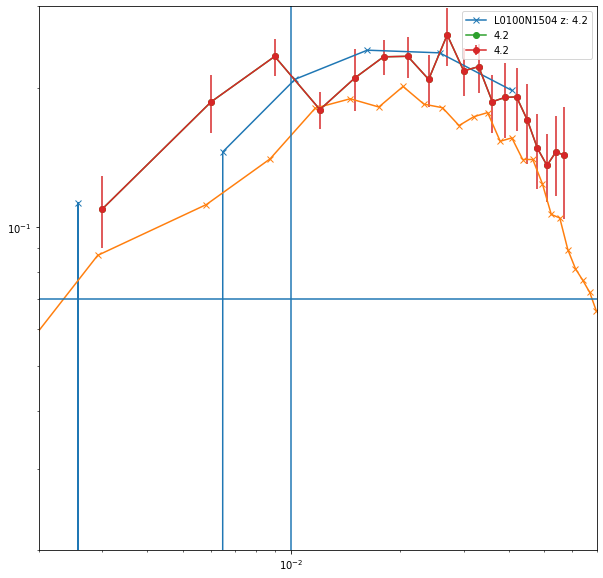

In [321]:
fontsize = 20
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

#for sim in sims:
sim = 'L0100N1504'

vz= str(4.2) #vidz[-1]
#for z,vz in zip(FPS_zs,vidz):

ax.plot(kcent,1.3*(kPkbinned/np.pi), 'x-', label=sim+" z: "+str(z))
ax.plot(k,np.mean(akPk,axis=0)/np.pi,'x-')
Vidk = viddata['TableA1']['Redshifts'][vz]['k']['Value']
Vidpf = viddata['TableA1']['Redshifts'][vz]['P_F']['Value']
ax.plot(Vidk,Vidk*Vidpf/np.pi,marker='o',label = vz)
err_stat = viddata['TableA1']['Redshifts'][vz]['sigma_stat']['Value']
err_sys = viddata['TableA1']['Redshifts'][vz]['sigma_sys']['Value']
err = np.sqrt(err_stat**2 + err_sys**2)
ax.errorbar(Vidk,Vidk*Vidpf/np.pi ,yerr=(Vidk*err/np.pi),marker='o',label = vz)
ax.set_xlim(0.002, 0.07)
ax.set_ylim(0.02, 0.3)
ax.axhline(y=0.07)
ax.axvline(x=0.01)

ax.semilogx()
ax.semilogy()

ax.legend()

In [191]:
pwd

'/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/Examples/Analysis'